In [ ]:
# Pie chart for recharge model 

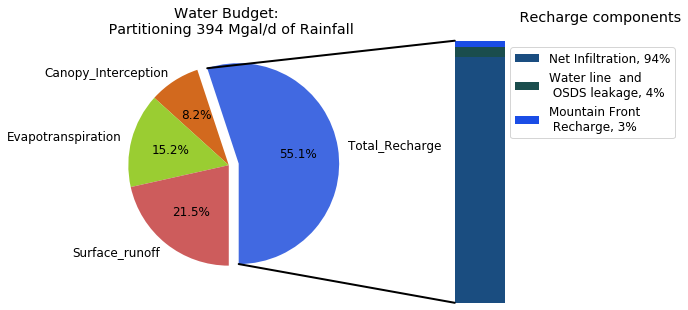

In [340]:
from matplotlib.patches import ConnectionPatch
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

ax1.set_title('Water Budget: \n Partitioning 394 Mgal/d of Rainfall')

# pie chart parameters
colors = ["royalblue", "chocolate", "yellowgreen", "indianred" ]
ratios = [221, 33, 61, 86.3]
labels = ['Total_Recharge', 'Canopy_Interception', 'Evapotranspiration', "Surface_runoff"]
explode = [0.1, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -90 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, colors=colors)


# bar chart parameters

xpos = 0
bottom = 0
ratios = [ 207.3,  8, 5.7]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3],  [.1, .3, .9]]
#colors = list(reversed(colors))


for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    bottom += height
    
    #ypos = bottom + ax2.patches[j].get_height() / 2
    #ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),#ha='center')

label = ['Net Infiltration, 94%',  'Water line  and \n OSDS leakage, 4%', 'Mountain Front \n Recharge, 3%']
#label = list(reversed(label))



ax2.set_title('                                                    Recharge components')
ax2.legend(label,  loc=1, bbox_to_anchor=(0.8, .45, 0.5, 0.5))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)


# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)

con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)


#plt.tight_layout()
plt.show()
